<a href="https://colab.research.google.com/github/Ai-deen/MachineLearning/blob/main/Hcaptcha_Breaker_Ensemble_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 02

Name:Lahari Sreeja

Roll Number:12041570

References Used to Complete the Assignment

1.   https://www.geeksforgeeks.org/
2.   https://medium.com/
3.   https://towardsdatascience.com/
4.   https://machinelearningmastery.com/
5.   https://stackoverflow.com/
6.   class notes and tutorials 



## Part A: Multi-Class Classification

Captchas were invented to prevent bots from attacking websites. But the ML models are breaking captchas. Thus, stronger captchas are being invented. In this part, we will train a ML model to break hcaptcha (https://www.hcaptcha.com/ )!!

Please download the following dataset: https://github.com/sarang-iitb/H-captcha-dataset

### 0. Load the dataset

In [1]:
# cloning
!git clone https://github.com/sarang-iitb/H-captcha-dataset

Cloning into 'H-captcha-dataset'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [2]:
import zipfile
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [3]:
unzip_data('/content/H-captcha-dataset/hcaptcha_dataset.zip')

In [4]:
import os
PATH = 'hcaptcha_dataset'

train = os.path.join(PATH, 'train')
test = os.path.join(PATH,'test')

In [5]:
import os
# Get the path of current working directory
path = 'hcaptcha_dataset'
# Get the list of all files and directories
# in current working directory
dir_list = os.listdir(path)
print("Files and directories in '", path, "' :") 
# print the list
print(dir_list)

Files and directories in ' hcaptcha_dataset ' :
['test', 'train']


### 1. Data Cleaning and Visualization

a) Check out the labels in the dataset. How many images belong to each class?

In [6]:
import os
path = 'hcaptcha_dataset/train'
dir_list = os.listdir(path)
print("Classes/labels:")
print(dir_list)

Classes/labels:
['bicycle', 'boat', 'motorbus', 'airplane', 'motorcycle', 'truck', 'seaplane']


In [7]:
import os
path = 'hcaptcha_dataset/test'
dir_list = os.listdir(path)
print("Classes/labels:")
print(dir_list)

Classes/labels:
['bicycle', 'boat', 'motorbus', 'airplane', 'motorcycle', 'truck', 'seaplane']


In [8]:
# Count of images belonging to each class in training set
train_cout = [len(files) for r, d, files in os.walk(train)]
del train_cout[0]
train_cout

[304, 528, 256, 402, 592, 656, 280]

In [9]:
# Count of images belonging to each class in testing set
test_cout = [len(files) for r, d, files in os.walk(test)]
del test_cout[0]
test_cout

[71, 134, 61, 101, 141, 163, 75]

b) How many train and test images are present in your dataset? 

In [10]:
# Number of training images in the dataset
sum([len(files) for r, d, files in os.walk(train)])

3018

In [11]:
# Number of testing images in the dataset
sum([len(files) for r, d, files in os.walk(test)])

746

c) Write a function to display a random image and its shape. Find out whether
the shape of each image is the same or not. If not then make all images of the
same shape.

Label: motorcycle


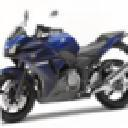

(128, 128, 3)

In [12]:
# Function to display a random image and its shape
import os
import random 
import cv2
from google.colab.patches import cv2_imshow
path="hcaptcha_dataset/train/"
files=os.listdir(path)
x=random.choice(files)
a = path+x
files=os.listdir(a)
d = random.choice(files)
k = a +'/' +d
# Using cv2.imread() method
img = cv2.imread(k)

# Displaying the image
print("Label:",x)
cv2_imshow(img)
img.shape


All images do not have same size.So,we will make all images same size .

In [13]:
#To make all images to the same size
import os
from PIL import Image

PATH = "hcaptcha_dataset/train/"
Copy_to_path="hcaptcha_dataset/train/"

for filename in os.listdir(PATH):
  for file in os.listdir(PATH+filename):
    img = Image.open(os.path.join(PATH+filename,file)) # images are color images
    img = img.resize((128,128), Image.ANTIALIAS)
    img.save(Copy_to_path+filename+"/"+file)


d) Do you think removing color channels (R, G, B) from images would lead to
poor modeling? How can you justify converting each image to greyscale? What
will be the effect of using a colored 3-channel image over a grayscale one on the
classification model’s performance?

It depends on the object of classification. If color has no significance in the images to classify then its better to go for grey scale images to avoid false classification and complexities. The given dataset has motorcycle,boat,truck,seaplane,bicycle,motorbus,airplane images and we dont require rgb values to recognise them.

In [14]:
#To make all images to gray scale
from PIL import Image, ImageOps

PATH = "hcaptcha_dataset/train/"
Copy_to_path="hcaptcha_dataset/train/"

for filename in os.listdir(PATH):
  for file in os.listdir(PATH+filename):
    img = Image.open(os.path.join(PATH+filename,file)) # images are color images
    gray_image = ImageOps.grayscale(img)
    gray_image.save(Copy_to_path+filename+"/"+file)


e) Should you normalize your color channel values? Based on your answers do
the steps you think will be best for your model.

Image Normalization is a process which changes the range of pixel intensity values resulting in the image with a better contrast.In this way we get that very dark images become clearer and we can observe clear image than the original one.We want features that differ the images so to get clear features its better to normalize the images.

In [15]:
#Normalization of Images
import cv2
import numpy as np

PATH = "hcaptcha_dataset/train/"
Copy_to_path="hcaptcha_dataset/train/"

for filename in os.listdir(PATH):
  for file in os.listdir(PATH+filename):
    image = cv2.imread(PATH+filename+"/"+file)
    image_norm = cv2.normalize(image, None, alpha=0,beta=200, norm_type=cv2.NORM_MINMAX)
    cv2.imwrite(PATH+filename+"/"+file, image_norm)

f) Visualize 3 random training images along with the labels for each class. The
dataset was manually labeled, do you spot any errors in the labels?

Label:  bicycle


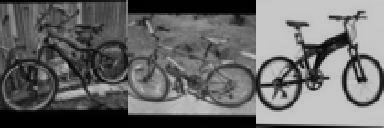

Label:  boat


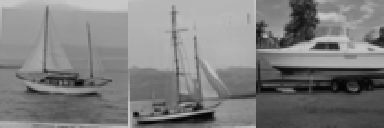

Label:  motorbus


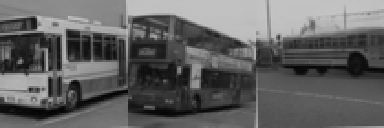

Label:  airplane


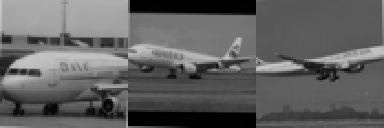

Label:  motorcycle


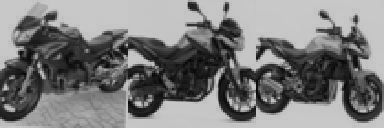

Label:  truck


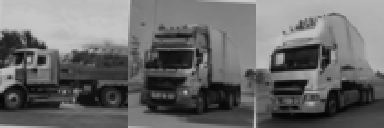

Label:  seaplane


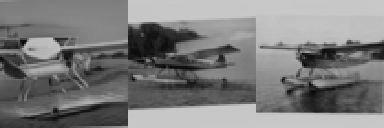

In [16]:
# Function to display a random image and its shape
PATH = "hcaptcha_dataset/train/"
for filename in os.listdir(PATH):
  files=os.listdir(PATH+filename)
  x1=random.choice(files)
  x2=random.choice(files)
  x3=random.choice(files)
  a1 = PATH+filename+'/'+x1
  a2 = PATH+filename+'/'+x2
  a3 = PATH+filename+'/'+x3
  img1 = cv2.imread(a1)
  img2 = cv2.imread(a2)
  img3 = cv2.imread(a3)
  Hori = np.concatenate((img1, img2, img3), axis=1)
  print("Label: ",filename)
  cv2_imshow(Hori)

Some images are mislabeled in the given data.

### 2. Preparing Balanced Samples for Training using only the Training set provided to you.

a) Do you think if you apply cross-validation to the dataset then all the crossvalidation folds will be similar? Why or why not?

No,on applying cross-validation to the dataset,all the cross validation folds will not be similar as each folder contains unequal number of images.Each fold will not contain equal number of images from each class thus resulting in bad training set.

b) What can you do to ensure that every fold contains images from each class and no duplicates? Do the needful on your dataset that will ensure similar crossvalidation folds.

In [17]:
#appending the pics to the training data list
PATH = "hcaptcha_dataset/train/"
training_data = []
training_labels = []
for filename in os.listdir(PATH):
  for file in os.listdir(PATH+filename):
    image = cv2.imread(PATH+filename+"/"+file, cv2.IMREAD_GRAYSCALE)
    training_data.append(image)
    training_labels.append(filename)

In [18]:
#encoding training labels
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_labels= label_encoder.fit_transform(training_labels)

In [19]:
#labels and their code mapping
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(le_name_mapping)

{'airplane': 0, 'bicycle': 1, 'boat': 2, 'motorbus': 3, 'motorcycle': 4, 'seaplane': 5, 'truck': 6}


In [21]:
#Shuffling the training data to ensure equal distribution of images in each folds
import random
temp = list(zip(training_data, train_labels))
random.shuffle(temp)
res1, res2 = zip(*temp)
# res1 and res2 come out as tuples, and so must be converted to lists.
training_data, train_labels = list(res1), list(res2)

0


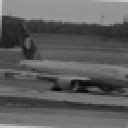

In [22]:
data = Image.fromarray(training_data[56])
print(train_labels[56])
data

In [23]:
#Flattening the image data array for calculation in models
train_data_c = []
for x in range(len(training_data)):
  train_data_c.append(training_data[x].flatten())

In [24]:
# create training and testing splits for cross validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_c, train_labels, test_size=0.2)
print (len(X_train), len(y_train))

2414 2414


In [25]:
from collections import Counter
print(Counter(y_train).keys()) 
print(Counter(y_train).values()) 

dict_keys([1, 6, 4, 0, 2, 3, 5])
dict_values([249, 533, 465, 330, 423, 200, 214])


We can see that the values are shuffled and properly distributed respectively.

####Test data preparation:

In [26]:
#To make all images to the same size
import os
from PIL import Image, ImageOps

PATH = "hcaptcha_dataset/test/"
Copy_to_path="hcaptcha_dataset/test/"

for filename in os.listdir(PATH):
  for file in os.listdir(PATH+filename):
    img = Image.open(os.path.join(PATH+filename,file)) # images are color images
    img = img.resize((128,128), Image.ANTIALIAS)
    gray_image = ImageOps.grayscale(img)
    img.save(Copy_to_path+filename+"/"+file)

In [27]:
#Normalization of Images
import cv2
import numpy as np

PATH = "hcaptcha_dataset/test/"
Copy_to_path="hcaptcha_dataset/test/"

for filename in os.listdir(PATH):
  for file in os.listdir(PATH+filename):
    image = cv2.imread(PATH+filename+"/"+file)
    image_norm = cv2.normalize(image, None, alpha=0,beta=200, norm_type=cv2.NORM_MINMAX)
    cv2.imwrite(PATH+filename+"/"+file, image_norm)

In [28]:
#appending the test images to the testing data list
PATH = "hcaptcha_dataset/test/"
testing_data = []
testing_labels = []
for filename in os.listdir(PATH):
  for file in os.listdir(PATH+filename):
    image = cv2.imread(PATH+filename+"/"+file, cv2.IMREAD_GRAYSCALE)
    testing_data.append(image)
    testing_labels.append(filename)

In [29]:
#encoding training labels
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
test_labels= label_encoder.fit_transform(testing_labels)

In [30]:
#Flattening the image data array for calculation in models
test_data = []
for x in range(len(testing_data)):
  test_data.append(testing_data[x].flatten())

### 3. Is Logistic regression a good algorithm for your dataset? Why or why not Based on the classification algorithms taught in class, which algorithms can be used to solve this problem?

No,Logistic Regression is not a good algorithm for this Dataset.Logistic Regression is used to predict multi-class variables which are not only categorical but also follow an order(low to high/high to low). The given dataset requires us to classify images according to labels and not their order of importance so logistic regression does not work for this kind of classification.

In [ ]:
from sklearn.linear_model import LogisticRegression
#Fit Logistic Regression model:
logisticregression = LogisticRegression(C=1, multi_class='ovr',
                                 max_iter=100).fit(X_train, y_train)
print("test set score: %f" % logisticregression.score(X_test, y_test))

In [32]:
#We can see that the testset score on running is: 0.713576 , it is not really accurate when compared to the other models.

KNN,Desicion trees and SVM classifiers can be used on the dataset.

### 4. Train the KNN classifier algorithm on the training dataset. Don’t use the test set at this time. 

a) What distance/similarity function should we use for comparing images?
Compare at least 3 different metrics on a few random samples to get some
understanding of how they work.

Cosine distance/similarity on random images and in KNN:

In [33]:
#Cosine distance/similarity function on random image sample
from PIL import Image
import numpy as np

img1 = Image.open('/content/hcaptcha_dataset/train/bicycle/1650203879375_11.jpg')
img2 = Image.open('/content/hcaptcha_dataset/train/bicycle/1650200325057_16.jpg')
img3 = Image.open('/content/hcaptcha_dataset/train/truck/1650200101550_0.jpg')
img_array1 = np.array(img1)
img_array2 = np.array(img2)
img_array3 = np.array(img3)

img_array1 = img_array1.flatten()
img_array2 = img_array2.flatten()
img_array3 = img_array3.flatten()
img_array1 = img_array1/255
img_array2 = img_array2/255
img_array3 = img_array3/255
from scipy import spatial

similarity1 = -1 * (spatial.distance.cosine(img_array1, img_array2) - 1)
similarity = -1 * (spatial.distance.cosine(img_array1, img_array3) - 1)
print("Similarity between random bicycle images using cosine function:",similarity1)
print("Similarity between random bicycle and truck images using cosine function:",similarity)

Similarity between random bicycle images using cosine function: 0.7928612420262715
Similarity between random bicycle and truck images using cosine function: 0.5817381912169385


In [34]:
#Fitting the Model and Making Predictions 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=5,metric='cosine')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix
#Calculating Model Accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the model:' + str(round(accuracy, 2)) + ' %.')


Accuracy of the model:67.05 %.


Euclidean distance function on random images and in KNN:

In [35]:
#Euclidean distance function on random image samples
from PIL import Image
import numpy as np

img1 = Image.open('/content/hcaptcha_dataset/train/bicycle/1650203879375_11.jpg')
img2 = Image.open('/content/hcaptcha_dataset/train/bicycle/1650200278189_16.jpg')
img3 = Image.open('/content/hcaptcha_dataset/train/truck/1650200101550_0.jpg')
img_array1 = np.array(img1)
img_array2 = np.array(img2)
img_array3 = np.array(img3)

img_array1 = img_array1.flatten()
img_array2 = img_array2.flatten()
img_array3 = img_array3.flatten()
img_array1 = img_array1/255
img_array2 = img_array2/255
img_array3 = img_array3/255
from scipy import spatial

similarity1 =  (spatial.distance.euclidean(img_array1, img_array2))
similarity =  (spatial.distance.euclidean(img_array1, img_array3))
print("Euclidean distance between random bicycle images:",similarity1)
print("Euclidean distance between random bicycle and truck images",similarity)

Euclidean distance between random bicycle images: 71.80176735077173
Euclidean distance between random bicycle and truck images 105.39930445439113


In [36]:
#Fitting the Model and Making Predictions 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix
#Calculating Model Accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the model:' + str(round(accuracy, 2)) + ' %.')

Accuracy of the model:73.51 %.


Correlation distance function on random images and in KNN:

In [37]:
#Correlation distance function on random image samples
from PIL import Image
import numpy as np

img1 = Image.open('/content/hcaptcha_dataset/train/motorcycle/1650199971268_8.jpg')
img2 = Image.open('/content/hcaptcha_dataset/train/motorcycle/1650200380765_15.jpg')
img3 = Image.open('/content/hcaptcha_dataset/train/boat/1650200939104_7.jpg')
img_array1 = np.array(img1)
img_array2 = np.array(img2)
img_array3 = np.array(img3)

img_array1 = img_array1.flatten()
img_array2 = img_array2.flatten()
img_array3 = img_array3.flatten()
img_array1 = img_array1/255
img_array2 = img_array2/255
img_array3 = img_array3/255
from scipy import spatial

similarity1 =  (spatial.distance.correlation(img_array1, img_array2))
similarity =  (spatial.distance.correlation(img_array1, img_array3))
print("Correlation distance between random motorcycle images:",similarity1)
print("Correlation distance between random motorcycle and boat images",similarity)

Correlation distance between random motorcycle images: 0.399233520208654
Correlation distance between random motorcycle and boat images 1.3737957549299882


In [38]:
#Fitting the Model and Making Predictions 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=5,metric='correlation')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix
#Calculating Model Accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the model:' + str(round(accuracy, 2)) + ' %.')

Accuracy of the model:80.46 %.


Manhattan distance function on random images and in KNN:

In [39]:
#Manhattan distance function on random image samples
from PIL import Image
import numpy as np

img1 = Image.open('/content/hcaptcha_dataset/train/seaplane/1650245507261_17.jpg')
img2 = Image.open('/content/hcaptcha_dataset/train/seaplane/1650244339601_5.jpg')
img3 = Image.open('/content/hcaptcha_dataset/train/motorbus/1650200008405_6.jpg')
img_array1 = np.array(img1)
img_array2 = np.array(img2)
img_array3 = np.array(img3)

img_array1 = img_array1.flatten()
img_array2 = img_array2.flatten()
img_array3 = img_array3.flatten()
img_array1 = img_array1/255
img_array2 = img_array2/255
img_array3 = img_array3/255
from scipy import spatial

similarity1 =  (spatial.distance.cityblock(img_array1, img_array2))
similarity =  (spatial.distance.cityblock(img_array1, img_array3))
print("Manhattan distance between random seaplane images:",similarity1)
print("Manhattan distance between random seaplane and motorbus images",similarity)

Manhattan distance between random seaplane images: 5530.964705882352
Manhattan distance between random seaplane and motorbus images 14633.435294117644


In [40]:
#Fitting the Model and Making Predictions 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=5,metric='cityblock')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix
#Calculating Model Accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the model:' + str(round(accuracy, 2)) + ' %.')

Accuracy of the model:76.66 %.


We can see that when the distance metric is Correlation,we get high accuracy.

b) What is the impact of increasing K on the speed and accuracy of the
algorithm? 

When K(nearest neigbours) = 3:

In [41]:
# impact of increasing K on the speed and accuracy of the algorithm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=3,metric='correlation')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix
#Calculating Model Accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the model:' + str(round(accuracy, 2)) + ' %.')

Accuracy of the model:82.95 %.


When K(nearest neigbours) = 5:

In [42]:
# impact of increasing K on the speed and accuracy of the algorithm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=5,metric='correlation')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix
#Calculating Model Accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the model:' + str(round(accuracy, 2)) + ' %.')

Accuracy of the model:80.46 %.


When K(nearest neigbours) = 10:

In [43]:
# impact of increasing K on the speed and accuracy of the algorithm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=10,metric='correlation')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix
#Calculating Model Accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the model:' + str(round(accuracy, 2)) + ' %.')

Accuracy of the model:78.64 %.


In [44]:
# impact of increasing K on the speed and accuracy of the algorithm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=100,metric='correlation')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix
#Calculating Model Accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the model:' + str(round(accuracy, 2)) + ' %.')

Accuracy of the model:69.7 %.


We can see that on increasing number of nearest neighbours(K), the accuracy of the model keeps on decreasing.

c) Choose a good value of K and the distance metric based on cross-validation.

From the above data,we can take the *distance metric* as "**Correlation**" and the value of *K* as "**5**" to avoid over fitting and underfitting of data.

### 5. Train SVM classifiers on the dataset. Don’t use the test set at this time.

a) Which kernel functions can be used for this dataset? Why?

The possible kernels can be "rbf" and "poly" as we have multiclass variables.

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the model:' + str(round(accuracy, 2)) + ' %.')

Accuracy of the model:86.42 %.


In [46]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = SVC(kernel ='poly', degree = 3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the model:' + str(round(accuracy, 2)) + ' %.')

Accuracy of the model:80.79 %.


Gaussian Radial Basis Function (RBF)

It is one of the most preferred and used kernel functions in svm. It is usually chosen for non-linear data.From the above functions, we can see that we get high accuracy for RBF kernal function.

b) Which of the SVM implementations (SVC, SGDClassifier, NuSVC and LinearSVC)
is the best for this dataset? Why?


In [1172]:
#SVM implementations : SVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the SVC model:' + str(round(accuracy, 2)) + ' %.')

Accuracy of the SVC model:86.42 %.


In [48]:
#SVM implementations : SGDClassifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="log", penalty="l2")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the SGDClassifier model:' + str(round(accuracy, 2)) + ' %.')

Accuracy of the SGDClassifier model:70.53 %.


In [49]:
#SVM implementations : NuSVC
from sklearn.svm import NuSVC
nsvc = NuSVC()
nsvc.fit(X_train, y_train)
y_pred = nsvc.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the NuSVC model:' + str(round(accuracy, 2)) + ' %.')

Accuracy of the NuSVC model:78.64 %.


In [50]:
#SVM implementations : LinearSVC
from sklearn.svm import LinearSVC
LSVC = LinearSVC()
LSVC.fit(X_train, y_train)
y_pred = nsvc.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the LinearSVC model:' + str(round(accuracy, 2)) + ' %.')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Accuracy of the LinearSVC model:78.64 %.


We can see that out of SVC, SGDClassifier, NuSVC and LinearSVC,the best classifier for this data is **SVC**.

c) Finalize your SVM model based on cross-validation


The final SVM model based on the above tests is **SVC** model with "**rbf**" kernel as it shows the most accurate values.

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(train_data_c, train_labels)
y_pred = classifier.predict(test_data)
accuracy = accuracy_score(test_labels, y_pred)*100
print('Accuracy of the model:' + str(round(accuracy, 2)) + ' %.')

Accuracy of the model:88.2 %.


### 6. Evaluate and compare the classification models on the test set provided to you

a) Calculate the classification accuracy of both the models and compare

In [52]:
# KNN algorithm on the test data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

#Using Kfold Cross Validation to train the model
k = 10
for i in range(k):
  Xtrain = []
  ytrain = []
  Xtest  = []
  ytest  = []
  Xtrain = train_data_c.copy()
  Xtest = train_data_c[i]
  ytrain = train_labels.copy()
  ytest = train_labels[i]
  del Xtrain[i]
  del ytrain[i]
  classifier = KNeighborsClassifier(n_neighbors=5,metric='correlation')
  classifier.fit(Xtrain, ytrain)
  
y_pred1 = classifier.predict(test_data)

#Confusion Matrix
confusion_matrix1= confusion_matrix(test_labels, y_pred1)
#Calculating Model Accuracy
accuracy = accuracy_score(test_labels, y_pred1)*100
print('Accuracy of the KNN model:' + str(round(accuracy, 2)) + ' %.')

Accuracy of the KNN model:82.44 %.


In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

#Using crossvalidation to train the model
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(train_data_c, train_labels)
y_pred = classifier.predict(test_data)

#Confusion Matrix
confusion_matrix= confusion_matrix(test_labels, y_pred)
accuracy = accuracy_score(test_labels, y_pred)*100
print('Accuracy of the SVC model:' + str(round(accuracy, 2)) + ' %.')

Accuracy of the SVC model:88.2 %.


We can see that SVC model gives better accuracy for classification than KNN model.

b) Which are the two classes that were most confused by your model? What
classification evaluation metric can be used to best visualize it? Plot the
visualization for both models

In [54]:
#Errors 
actual_value1 = []
error_value1 = []
actual_value = []
error_value = [] 
for i in range(len(test_labels)):
  if test_labels[i] != y_pred1[i]:
    actual_value1.append(test_labels[i])
    error_value1.append(y_pred1[i])
  if test_labels[i] != y_pred1[i]:
    actual_value.append(test_labels[i])
    error_value.append(y_pred[i])

In [55]:
from statistics import mode
def get_key(val):
    for key, value in dict.items():
        if val == value:
            return key
dict = {'airplane': 0, 'bicycle': 1, 'boat': 2, 'motorbus': 3, 'motorcycle': 4, 'seaplane': 5, 'truck': 6}
print("The class that is most confused by SVC is",get_key(mode(actual_value)))
print("The class that is most confused by KNeighborsClassifier is",get_key(mode(actual_value1)))

The class that is most confused by SVC is motorbus
The class that is most confused by KNeighborsClassifier is motorbus


We can see that the class motorbus is the class that is most confused by both the models.

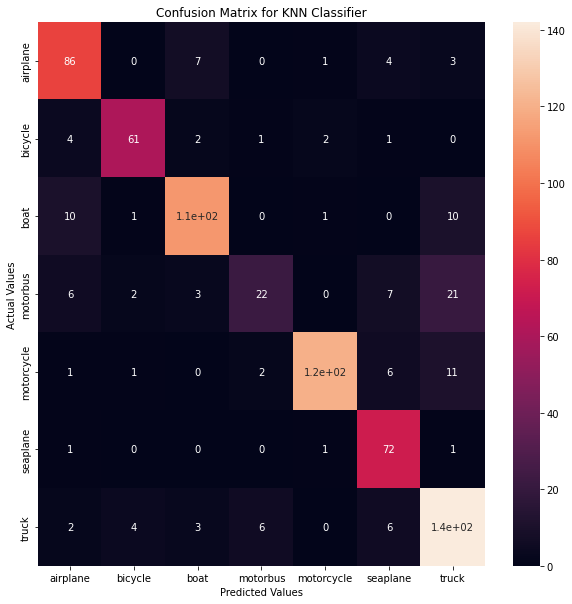

In [56]:
#KNN Confusion matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
cm_df = pd.DataFrame(confusion_matrix1,
                     index = ['airplane', 'bicycle', 'boat', 'motorbus', 'motorcycle', 'seaplane', 'truck'], 
                     columns = ['airplane', 'bicycle', 'boat', 'motorbus', 'motorcycle', 'seaplane', 'truck'])
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix for KNN Classifier')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

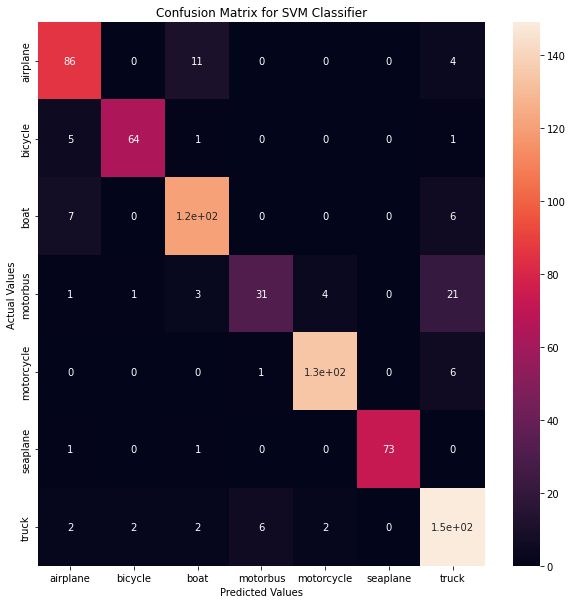

In [57]:
#SVC Confusion matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
cm_df = pd.DataFrame(confusion_matrix,
                     index = ['airplane', 'bicycle', 'boat', 'motorbus', 'motorcycle', 'seaplane', 'truck'], 
                     columns = ['airplane', 'bicycle', 'boat', 'motorbus', 'motorcycle', 'seaplane', 'truck'])
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix for SVM Classifier')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

c) Do you think you can maximize both Precision and Recall for a model? What
do you think will be a better metric to judge a model? 

In [58]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support  = score(test_labels,  y_pred1)
df_from_arr = pd.DataFrame(data=[precision, recall,fscore,support ]).T
df_from_arr.columns = ['precision', 'recall', 'fscore', 'support' ]
df_from_arr['labels'] =['airplane', 'bicycle', 'boat', 'motorbus', 'motorcycle', 'seaplane', 'truck']

print(df_from_arr)

   precision    recall    fscore  support      labels
0   0.781818  0.851485  0.815166    101.0    airplane
1   0.884058  0.859155  0.871429     71.0     bicycle
2   0.881890  0.835821  0.858238    134.0        boat
3   0.709677  0.360656  0.478261     61.0    motorbus
4   0.960000  0.851064  0.902256    141.0  motorcycle
5   0.750000  0.960000  0.842105     75.0    seaplane
6   0.755319  0.871166  0.809117    163.0       truck


In [59]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support  = score(test_labels,  y_pred)
df_from_arr1 = pd.DataFrame(data=[precision, recall,fscore,support ]).T
df_from_arr1.columns = ['precision', 'recall', 'fscore', 'support' ]
df_from_arr1['labels'] =['airplane', 'bicycle', 'boat', 'motorbus', 'motorcycle', 'seaplane', 'truck']

print(df_from_arr1)

   precision    recall    fscore  support      labels
0   0.843137  0.851485  0.847291    101.0    airplane
1   0.955224  0.901408  0.927536     71.0     bicycle
2   0.870504  0.902985  0.886447    134.0        boat
3   0.815789  0.508197  0.626263     61.0    motorbus
4   0.957143  0.950355  0.953737    141.0  motorcycle
5   1.000000  0.973333  0.986486     75.0    seaplane
6   0.796791  0.914110  0.851429    163.0       truck


No,we cannot maximize both Precision and Recall for a model as improving precision typically reduces recall and vice versa.Precision is "how useful the search results are", and recall is "how complete the results are".

Recall is a better metric to judge a model as recall is the measure of how many observations our model correctly predicted over the total amount of observations.

d) A bridge in Raipur is unstable and we want to avoid fatalities. Trucks and
Buses should be stopped while motorbikes and bicycles can be allowed. Which
of your 2 models do you think will be better for this task? Explain with the help of
Precision/Recall, ROC curve and AUC.

In [60]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support  = score(test_labels,  y_pred1)
df_from_arr = pd.DataFrame(data=[precision, recall,fscore,support ]).T
df_from_arr.columns = ['precision', 'recall', 'fscore', 'support' ]
df_from_arr['labels'] =['airplane', 'bicycle', 'boat', 'motorbus', 'motorcycle', 'seaplane', 'truck']
print("KNN model:")
print(df_from_arr)

KNN model:
   precision    recall    fscore  support      labels
0   0.781818  0.851485  0.815166    101.0    airplane
1   0.884058  0.859155  0.871429     71.0     bicycle
2   0.881890  0.835821  0.858238    134.0        boat
3   0.709677  0.360656  0.478261     61.0    motorbus
4   0.960000  0.851064  0.902256    141.0  motorcycle
5   0.750000  0.960000  0.842105     75.0    seaplane
6   0.755319  0.871166  0.809117    163.0       truck


In [61]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support  = score(test_labels,  y_pred)
df_from_arr1 = pd.DataFrame(data=[precision, recall,fscore,support ]).T
df_from_arr1.columns = ['precision', 'recall', 'fscore', 'support' ]
df_from_arr1['labels'] =['airplane', 'bicycle', 'boat', 'motorbus', 'motorcycle', 'seaplane', 'truck']
print("SVC model:")
print(df_from_arr1)

SVC model:
   precision    recall    fscore  support      labels
0   0.843137  0.851485  0.847291    101.0    airplane
1   0.955224  0.901408  0.927536     71.0     bicycle
2   0.870504  0.902985  0.886447    134.0        boat
3   0.815789  0.508197  0.626263     61.0    motorbus
4   0.957143  0.950355  0.953737    141.0  motorcycle
5   1.000000  0.973333  0.986486     75.0    seaplane
6   0.796791  0.914110  0.851429    163.0       truck


Text(0, 0.5, 'True Positive rate')

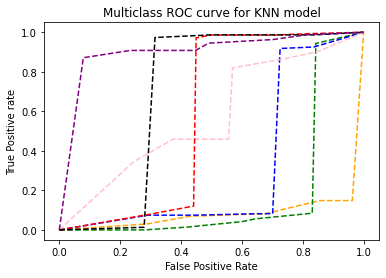

In [1168]:
from sklearn.metrics import roc_curve, auc
fpr = {}
tpr = {}
thresh ={}

n_class = 7

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_labels, y_pred1, pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='purple', label='Class 6 vs Rest')

plt.title('Multiclass ROC curve for KNN model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

Text(0, 0.5, 'True Positive rate')

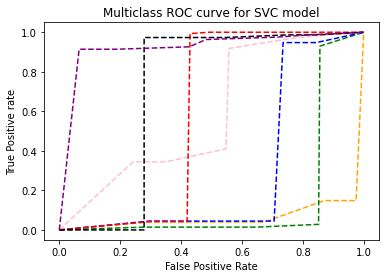

In [1169]:
fpr = {}
tpr = {}
thresh ={}

n_class = 7

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_labels, y_pred, pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='purple', label='Class 6 vs Rest')

plt.title('Multiclass ROC curve for SVC model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

To determine which model is better,we have to take few decisions accordingly:

*   For motorcycles and bicycles,**precision** should be more than recall.
*   For Trucks and Buses,**recall** value should be more than precision.
*   The area under ROC curve should be more on comparision(AUC value)



SVC is better than KNN on comparsion with respect to precision,recall and ROC curves.

e) Find the Micro and Macro F1 Score of both of your models and comment on
which is better and why.


In [64]:
from sklearn.metrics import f1_score
print("Micro F1 Score of SVC Classifier",f1_score(test_labels, y_pred, average='micro')) 
print("Macro F1 Score of SVC Classifier",f1_score(test_labels, y_pred, average='macro'))
print("Micro F1 Score of KNN Classifier",f1_score(test_labels, y_pred1, average='micro'))
print("Macro F1 Score of KNN Classifier",f1_score(test_labels, y_pred1, average='macro'))

Micro F1 Score of SVC Classifier 0.8820375335120644
Macro F1 Score of SVC Classifier 0.8684554425295696
Micro F1 Score of KNN Classifier 0.824396782841823
Macro F1 Score of KNN Classifier 0.7966529395766011


The disadvantage of using micro-averaging metric is that it is heavily influenced by abundant classes in the dataset. So if the classifier performs very well on majority classes and poorly on minority classes, the micro-average F1 score will still be high.Macro-averaging is to be preferred over micro-averaging in case of multi classes, because it weighs each of the classes equally and isn’t influenced by the number of examples of each class.

Based on the above instructions, we can see that most of the times SVC is better than KNN.So we can pick SVC as our final model for classification of hcaptcha images.

### 7. Write a function to create a random 3x3 captcha matrix and ask the user to label the class with maximum number of examples. Estimate how often your best model will be able to solve the captcha problem correctly.


In [455]:
correct_values = []
wrong_values = []

Hcaptcha Matrix:


(-0.5, 127.5, 127.5, -0.5)

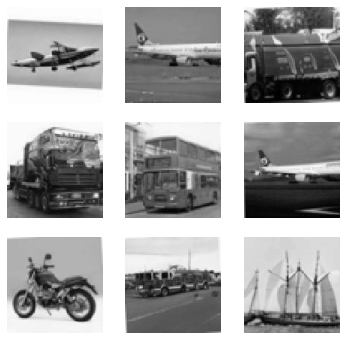

In [1153]:
#Hcaptcha matrix 

import cv2
from matplotlib import pyplot as plt
print("Hcaptcha Matrix:")
fig = plt.figure(figsize=(6, 6))
  
# setting values to rows and column variables
rows = 3
columns = 3
  
# reading images
import os
import random 
import cv2

temp = list(zip(testing_data,testing_labels,test_data))
imgs = random.choices(temp, k=9)
proimg = [x[2] for x in imgs]
lebls = [x[1] for x in imgs]
imgs = [x[0] for x in imgs]

fig.add_subplot(rows, columns, 1)
plt.imshow(imgs[0],cmap = "gray")
plt.axis('off')

fig.add_subplot(rows, columns, 2)  
plt.imshow(imgs[1],cmap = "gray")
plt.axis('off')

fig.add_subplot(rows, columns, 3)
plt.imshow(imgs[2],cmap = "gray")
plt.axis('off')
  
fig.add_subplot(rows, columns, 4)
plt.imshow(imgs[3],cmap = "gray")
plt.axis('off')

fig.add_subplot(rows, columns, 5)
plt.imshow(imgs[4],cmap = "gray")
plt.axis('off')

fig.add_subplot(rows, columns, 6)
plt.imshow(imgs[5],cmap = "gray")
plt.axis('off')

fig.add_subplot(rows, columns, 7)
plt.imshow(imgs[6],cmap = "gray")
plt.axis('off')

fig.add_subplot(rows, columns, 8)
plt.imshow(imgs[7],cmap = "gray")
plt.axis('off')

fig.add_subplot(rows, columns, 9)
plt.imshow(imgs[8],cmap = "gray")
plt.axis('off') 


In [1154]:
# Machine learning model user predicting the hcaptcha matrix images
y = classifier.predict(proimg)
y

array([5, 0, 3, 6, 6, 0, 4, 6, 2])

In [1155]:
def get_key(val):
    for key, value in dict.items():
        if val == value:
            return key
dict = {'airplane': 0, 'bicycle': 1, 'boat': 2, 'motorbus': 3, 'motorcycle': 4, 'seaplane': 5, 'truck': 6}
guess = []
for i in range(len(y)):
  guess.append(get_key(y[i]))

In [1156]:
print("Labels guessed by user model:")
guess

Labels guessed by user model:


['seaplane',
 'airplane',
 'motorbus',
 'truck',
 'truck',
 'airplane',
 'motorcycle',
 'truck',
 'boat']

In [1157]:
print("Actual labels of images:")
lebls

Actual labels of images:


['seaplane',
 'airplane',
 'truck',
 'truck',
 'motorbus',
 'airplane',
 'motorcycle',
 'truck',
 'boat']

In [1167]:
#The class which is repeated maximum number of times
from collections import Counter
guess1  = max(guess,key=guess.count)
lebls1 = max(lebls,key=lebls.count)
print("The class which is repeated maximum number of times by the model user:",max(guess,key=guess.count))
print("The class which is repeated maximum number of times in actual labeling :",max(lebls,key=lebls.count))

The class which is repeated maximum number of times by the model user: truck
The class which is repeated maximum number of times in actual labeling : truck


In [1159]:
from matplotlib import pyplot as plt
import numpy as np
correct=0
wrong=0
if guess1 == lebls1:
  correct += 1
else :
  wrong += 1
correct_values.append(correct)
wrong_values.append(wrong)

In [1160]:
len(correct_values)

100

In [1164]:
print("The number of times model works correctly on hcaptcha matrix is:",correct_values.count(1))
print("The number of times model works incorrectly on hcaptcha matrix is:",wrong_values.count(1))

The number of times model works correctly on hcaptcha matrix is: 80
The number of times model works incorrectly on hcaptcha matrix is: 20


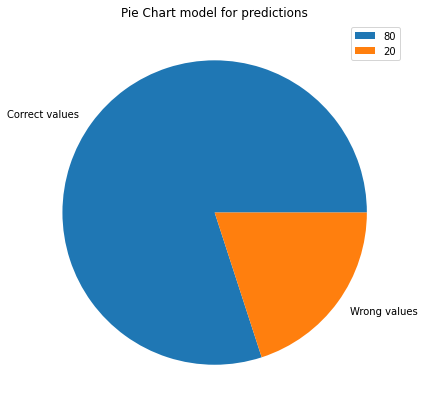

In [1171]:
labels = ["Correct values","Wrong values"]
data = [correct_values.count(1),wrong_values.count(1)]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels)
 
# show plot
plt.title('Pie Chart model for predictions')
plt.legend(data)
plt.show()

The total number of times the model is checked on different test hcaptchas: 100

*   The number of times model works correctly on hcaptcha matrix is: 80
*   The number of times model works incorrectly on hcaptcha matrix is: 20




The hcaptcha matrix is tested 100 times to check its accuracy.We can see that it works correctly 80 times and is wrong for 20 times.So,we can estimate that my best model will be able to solve the hcaptcha problem correctly 80% of the times.

## Part B: Ensemble Models

You started a Car Selling business and you are giving recommendations to people for buying cars.

We have provided a dataset to help you start your business.


Dataset: https://github.com/sarang-iitb/Car_Condition_evaluation_dataset


Now, your job is to train a robust model and we will test how good you are on the test set. 

###Access data from github

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# get the dataset
url1 = "https://raw.githubusercontent.com/sarang-iitb/Car_Condition_evaluation_dataset/main/sample%20submission.csv"
url2 = "https://raw.githubusercontent.com/sarang-iitb/Car_Condition_evaluation_dataset/main/training_data.csv"
url3 = "https://raw.githubusercontent.com/sarang-iitb/Car_Condition_evaluation_dataset/main/testing_data.csv"
dataset1 = pd.read_csv(url1)
train = pd.read_csv(url2)
test = pd.read_csv(url3)


In [ ]:
train

,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features,How_is_the_deal
0,vhigh,med,2,4,small,low,Bad_deal
1,vhigh,med,5more,4,small,low,Bad_deal
2,med,vhigh,5more,4,small,low,Bad_deal
3,high,high,3,2,med,med,Bad_deal
4,vhigh,vhigh,5more,4,small,med,Bad_deal
...,...,...,...,...,...,...,...
1549,high,vhigh,4,2,small,low,Bad_deal
1550,med,vhigh,4,more,med,high,Bad_deal
1551,vhigh,low,4,4,big,med,Bad_deal
1552,low,vhigh,3,more,small,high,Bad_deal


In [ ]:
test

,Deal_num,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features
0,0,low,low,5more,more,big,high
1,1,low,low,2,2,small,high
2,2,low,med,5more,4,med,low
3,3,low,low,4,2,big,low
4,4,low,low,4,2,med,high
...,...,...,...,...,...,...,...
169,169,low,med,4,2,small,low
170,170,low,med,5more,2,small,med
171,171,low,med,5more,more,big,low
172,172,low,high,5more,4,small,low


In [ ]:
trainc = train.copy()

In [ ]:
testc = test.copy()

### Data Preparation: Perform necessary transformations on the input dataset to prepare it for ML model training.

####Data Cleaning

In [ ]:
trainc.isnull().values.any()

False

In [ ]:
# Check no of rows & columns in the dataset
print("Shape of the Training data :", train.shape)

# See all the columns in the dataset
print("All columns are :", list(train.columns))

Shape of the Training data : (1554, 7)
All columns are : ['Buying_Cost', 'Maintainance_Cost', 'Number_of_doors', 'Number_of_Passenger', 'Luggage_Space', 'Safety_Features', 'How_is_the_deal']


In [ ]:
# Check datatypes & count of not-null values in each field
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Buying_Cost          1554 non-null   object
 1   Maintainance_Cost    1554 non-null   object
 2   Number_of_doors      1554 non-null   object
 3   Number_of_Passenger  1554 non-null   object
 4   Luggage_Space        1554 non-null   object
 5   Safety_Features      1554 non-null   object
 6   How_is_the_deal      1554 non-null   object
dtypes: object(7)
memory usage: 85.1+ KB


In [ ]:
categorical_features = train.select_dtypes(exclude='number').columns.tolist()
print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 7 categorical features: 

['Buying_Cost', 'Maintainance_Cost', 'Number_of_doors', 'Number_of_Passenger', 'Luggage_Space', 'Safety_Features', 'How_is_the_deal']


We can see from the data above that there are no null entries.All the columns type is object that is they are categorical values.We have to change them into numerical values.

In [ ]:
#We are finding out unique values in each column
print(train.Buying_Cost.unique())
print(train.Maintainance_Cost.unique())
print(train.Number_of_doors.unique())
print(train.Number_of_Passenger.unique())
print(train.Luggage_Space.unique())
print(train.Safety_Features.unique())
print(train.How_is_the_deal.unique())

['vhigh' 'med' 'high' 'low']
['med' 'vhigh' 'high' 'low']
['2' '5more' '3' '4']
['4' '2' 'more']
['small' 'med' 'big']
['low' 'med' 'high']
['Bad_deal' 'Nice_deal']


In [ ]:
#Replacing unique categorical values in each column with numerical labels
cleanup_nums = {"Buying_Cost":   {"low": 0, "med": 1, "high": 2, "vhigh": 3},
                "Maintainance_Cost":   {"low": 0, "med": 1, "high": 2, "vhigh": 3},
                "Number_of_doors":   {"2": 0, "3": 1, "4": 2, "5more": 3},
                "Number_of_Passenger":   {"2": 0, "4": 1, "more": 2},
                "Luggage_Space":   {"small": 0, "med": 1, "big": 2},
                "Safety_Features":   {"low": 0, "med": 1, "high": 2},
                "How_is_the_deal":   {"Bad_deal": 0, "Nice_deal": 1},
                }

trainc = trainc.replace(cleanup_nums)
trainc

,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features,How_is_the_deal
0,3,1,0,1,0,0,0
1,3,1,3,1,0,0,0
2,1,3,3,1,0,0,0
3,2,2,1,0,1,1,0
4,3,3,3,1,0,1,0
...,...,...,...,...,...,...,...
1549,2,3,2,0,0,0,0
1550,1,3,2,2,1,2,0
1551,3,0,2,1,2,1,0
1552,0,3,1,2,0,2,0


In [ ]:
testc = testc.drop(["Deal_num"],axis=1) 
cleanup_nums1 = {"Buying_Cost":   {"low": 0, "med": 1, "high": 2, "vhigh": 3},
                "Maintainance_Cost":   {"low": 0, "med": 1, "high": 2, "vhigh": 3},
                "Number_of_doors":   {"2": 0, "3": 1, "4": 2, "5more": 3},
                "Number_of_Passenger":   {"2": 0, "4": 1, "more": 2},
                "Luggage_Space":   {"small": 0, "med": 1, "big": 2},
                "Safety_Features":   {"low": 0, "med": 1, "high": 2}
                }

testc = testc.replace(cleanup_nums1)
testc

,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features
0,0,0,3,2,2,2
1,0,0,0,0,0,2
2,0,1,3,1,1,0
3,0,0,2,0,2,0
4,0,0,2,0,1,2
...,...,...,...,...,...,...
169,0,1,2,0,0,0
170,0,1,3,0,0,1
171,0,1,3,2,2,0
172,0,2,3,1,0,0


####Data Visualization

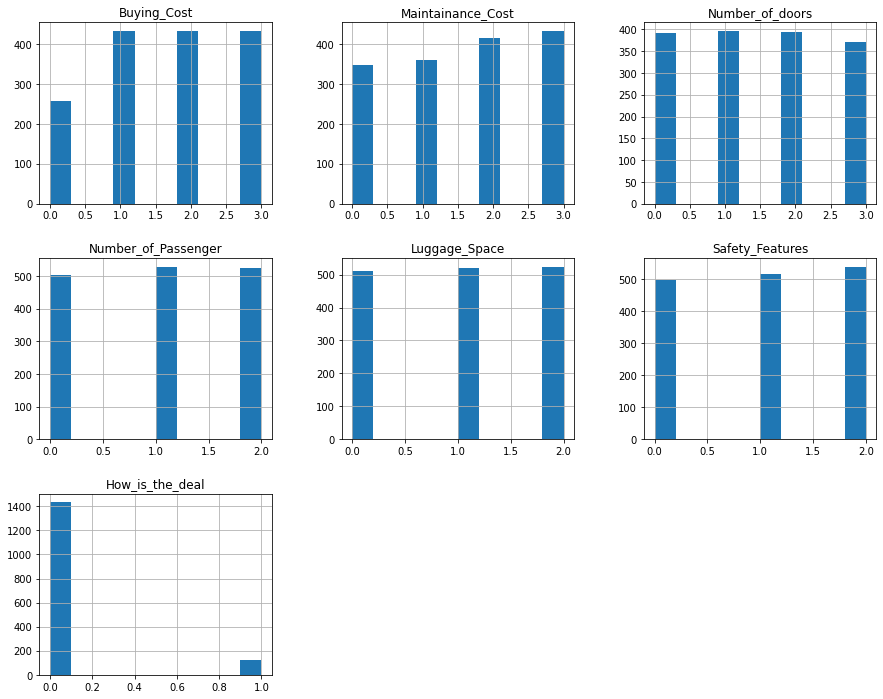

In [ ]:
import matplotlib.pyplot as plt
trainc.hist(bins=10, figsize=(15,12))
plt.show()

In [ ]:
corr_matrix = trainc.corr()
corr_matrix['How_is_the_deal'].sort_values(ascending=False)

How_is_the_deal        1.000000
Safety_Features        0.247524
Number_of_Passenger    0.170026
Luggage_Space          0.112068
Number_of_doors        0.016053
Maintainance_Cost     -0.253442
Buying_Cost           -0.345883
Name: How_is_the_deal, dtype: float64

In [ ]:
features = trainc.drop('How_is_the_deal',axis = 1)
target = trainc['How_is_the_deal']

####Data Splitting for Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, random_state=10)

In [ ]:
X_train.shape

(1165, 6)

In [ ]:
X_test.shape

(389, 6)

### Ensemble Model: Train any ensemble model of your choice combining your favorite models. In particular, we would like you to try both bagging and boosting.
* Bag of models of your choice
* Adaboost or XGBoost


####Bagging Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
#Desicion Tree Classifier
dtree = DecisionTreeClassifier(random_state = 10)
dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.9922879177377892


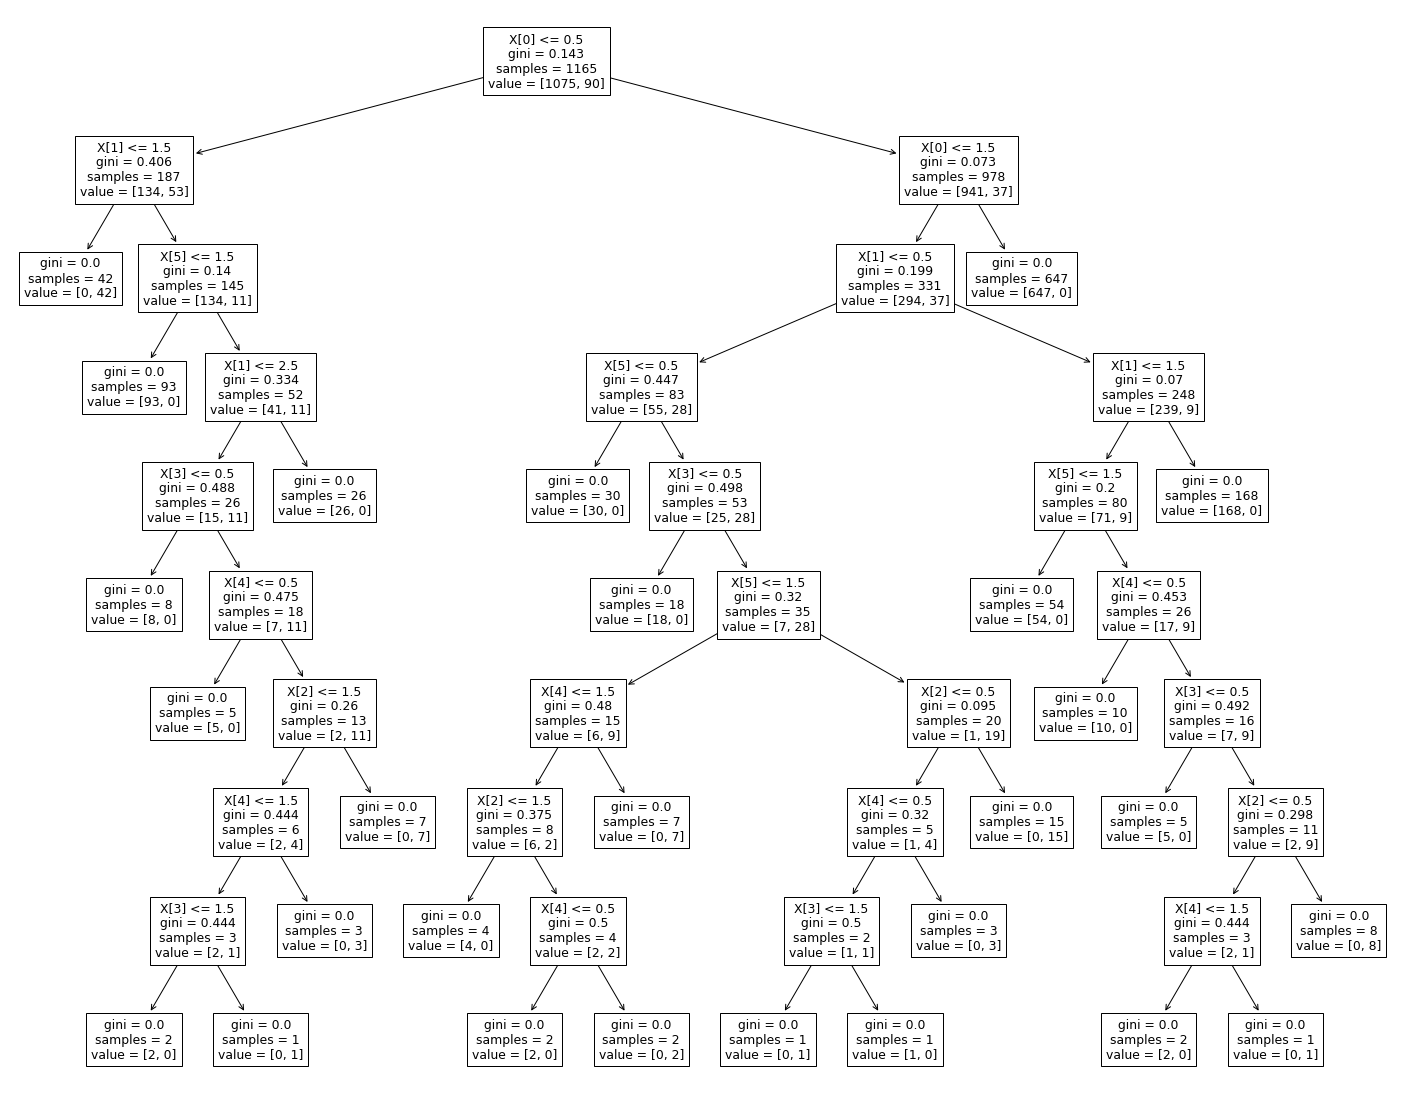

In [ ]:
#Plotting Desicion Tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree)

In [ ]:
#Decision Tree Classifier using Bagging
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=100, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_
print("ACCURACY OF THE MODEL(Decision Tree Classifier using Bagging): ",bag_model.score(X_test, y_test))

ACCURACY OF THE MODEL(Decision Tree Classifier using Bagging):  0.9948586118251928


In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test) 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL(RandomForestClassifier): ", accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL(RandomForestClassifier):  0.9922879177377892


In [ ]:
#Random Forest Classifier using Bagging
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(
base_estimator=RandomForestClassifier(), 
n_estimators=100, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_
print("ACCURACY OF THE MODEL(RandomForestClassifier using Bagging): ",bag_model.score(X_test, y_test))

ACCURACY OF THE MODEL(RandomForestClassifier using Bagging):  0.9897172236503856


In [ ]:
#SVC using Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
bag_model = BaggingClassifier(
base_estimator=SVC(probability=True, kernel='linear'), 
n_estimators=100, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_
print("ACCURACY OF THE MODEL(SVC using Bagging): ",bag_model.score(X_test, y_test))

ACCURACY OF THE MODEL(SVC using Bagging):  0.9768637532133676


####Boosting Classifier

####AdaBoost Classifier

In [ ]:
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier #for classifier
from sklearn import metrics
abc =AdaBoostClassifier(n_estimators=50,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("ACCURACY OF THE MODEL(AdaBoost Classifier):",metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL(AdaBoost Classifier): 0.9948586118251928


In [ ]:
#AdaBoost Classifier with SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("ACCURACY OF THE MODEL(AdaBoost Classifier with SVC):",metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL(AdaBoost Classifier with SVC): 0.922879177377892


In [ ]:
#AdaBoost Classifier with DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn import metrics
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,base_estimator=DecisionTreeClassifier(), 
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("ACCURACY OF THE MODEL(AdaBoost Classifier with DecisionTreeClassifier):",metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL(AdaBoost Classifier with DecisionTreeClassifier): 0.9897172236503856


In [ ]:
#AdaBoost Classifier with RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn import metrics
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,base_estimator=RandomForestClassifier(), 
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("ACCURACY OF THE MODEL(AdaBoost Classifier with RandomForestClassifier):",metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL(AdaBoost Classifier with RandomForestClassifier): 0.9922879177377892


####XGB Classifier

In [ ]:
#XGB Classifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)
 
# Predicting the Test set results
y_pred = my_model.predict(X_test)
 
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("ACCURACY OF THE MODEL(XGB Classifier):",accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL(XGB Classifier): 0.9897172236503856


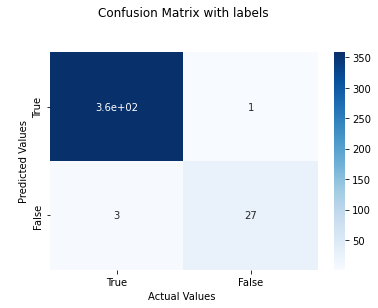

In [ ]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('Actual Values ')
ax.set_ylabel('\nPredicted Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

####Test Data

#####Adaboost classifier with Test Data

In [ ]:
from sklearn.ensemble import AdaBoostClassifier #for classifier
from sklearn import metrics
abc =AdaBoostClassifier(n_estimators=50,learning_rate=0.1)

# Train Adaboost Classifer
model = abc.fit(features, target)

#Predict the response for test dataset
y_pred = model.predict(testc)


In [ ]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
y = pd.DataFrame(y_pred)
y.value_counts()

0    136
1     38
dtype: int64

#####Adaboost classifier using RandomForestClassifier with Test Data

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,base_estimator=RandomForestClassifier(), 
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(features, target)

#Predict the response for test dataset
y_pred = model.predict(testc)

In [ ]:
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [ ]:
y = pd.DataFrame(y_pred)
y.value_counts()

1    89
0    85
dtype: int64

#####Desicion Tree Classifier with Test Data

In [ ]:

model = dtree.fit(features, target)

#Predict the response for test dataset
y_pred = model.predict(testc)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
y = pd.DataFrame(y_pred)
y.value_counts()

1    158
0     16
dtype: int64

#####Desicion Tree Classifier using Bagging with Test Data

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=100, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)
bag_model.fit(features, target)
y_pred = bag_model.predict(testc)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
y = pd.DataFrame(y_pred)
y.value_counts()

1    158
0     16
dtype: int64

So, on running the most accurate models on the test data, we finally decide that Desicion Tree Classifier using Bagging with Test Data is the most accurate value possible.

The final prediction data is:
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])